In [2]:
import numpy as np
import matplotlib.pyplot as plt
from src.preprocessing import process_video
from src.distance_measures import analyse_image, analyse_video
from src.gaussian_noise import generate_noise, generate_noise_array
from src.visualizer import visualize
# plt.rcParams['image.cmap'] = 'gray'
from matplotlib import cm
from skimage.color import label2rgb

In [ ]:
size = 400
L = 50

In [119]:
noise_list = generate_noise_array(size, amount=1000, threshold=0.2, smooth=2.6)

In [120]:
noiseF_list, noiseG_list = analyse_video(noise_list, L)

In [121]:
noiseF = np.mean(noiseF_list, axis=0)
noiseG = np.mean(noiseG_list, axis=0)

In [3]:
def calculate_variance(n):
    mean_curve = noiseF/noiseG
    
    varcurve = np.zeros(L+1)

    for i in range(int(len(noiseF_list)/n)):
        noiseF3 = np.mean(noiseF_list[i*n:(i+1)*n], axis=0)
        noiseG3 = np.mean(noiseG_list[i*n:(i+1)*n], axis=0)
        curve = noiseF3/noiseG3
        varcurve += (curve - mean_curve)**2
        
    varcurve = varcurve/(len(noiseF_list)/n-1)

    return np.sum(varcurve)/(L+1)

In [ ]:
def visualize_distribution(n):
    mean_curve = noiseF/noiseG
    

    for i in range(100):
        noiseF3 = np.mean(noiseF_list[i*n:(i+1)*n], axis=0)
        noiseG3 = np.mean(noiseG_list[i*n:(i+1)*n], axis=0)
        curve = noiseF3/noiseG3
        plt.plot(curve, color = 'b', alpha=0.4, linewidth=1)
        
        
    plt.plot(mean_curve, color = 'r', linewidth=3)
    plt.xlabel('r')
    plt.ylabel('fractional area overlap')
    plt.show()

    plt.show()

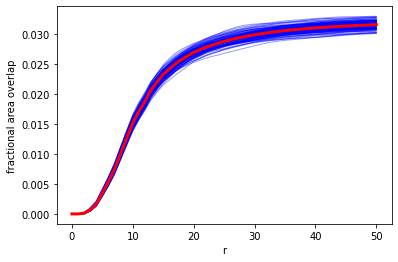

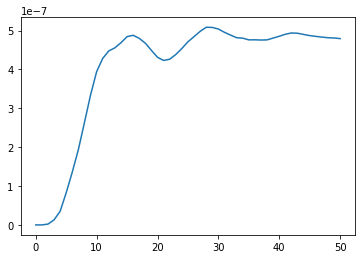

4.0104754838048006e-07

In [159]:
visualize_distribution(10)

In [ ]:
4.923380972009406e-06

In [4]:
newlist = [calculate_variance(x) for x in range(1,20)]

fig, ax = plt.subplots(1, figsize=(14,14))

ax.plot(newlist)
ax.set_xlabel('Number of curves used to approximate expected curve')
ax.set_ylabel('Average variance from true expected curve')

NameError: name 'noiseF' is not defined